#### Extracting ocr features

This was executed in google colab since keras-ocr gave us lots of problems when doing it locally

In [ ]:
import keras_ocr
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle

path_folder = "/content/dlnn-project_ia-group_15/data/JPEGImages"
name_imgs = os.listdir(path_folder)
pipeline = keras_ocr.pipeline.Pipeline()


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
tokens_imgs = {}
step = 100 # number of images to process at the same time

# Here to find the features of all images you have to remove the 10000 and put 0 instead
# it was done this way to have a checkpoint in case of crash
for i in range(10000, len(name_imgs), step):
  start = i
  end = min(len(name_imgs),i+step)
  print(i, i+step, len(name_imgs), len(tokens_imgs))

  # Read as many images as the step we set (100)
  images = [keras_ocr.tools.read(path_folder + "/" + img) for img in name_imgs[start:end]]

  # Resize the images to a size that the model can handle
  images2 = []
  for i,image in enumerate(images):
    images2.append(keras_ocr.tools.resize_image(image, max_scale=2, max_size=500)[0])

  images = images2
  del images2

  # Get the words in the images
  prediction_groups = pipeline.recognize(images)

  # Save the words in a dictionary
  for image, predictions in zip(name_imgs[start:end], prediction_groups):
      tokens_imgs[image] = [[token[0] for token in predictions]]

10000 10100 24255 0
13/13 [==============================] - 0s 14ms/step
10100 10200 24255 100
11/11 [==============================] - 0s 14ms/step
10200 10300 24255 200
10/10 [==============================] - 0s 14ms/step
10300 10400 24255 300
11/11 [==============================] - 0s 14ms/step
10400 10500 24255 400
11/11 [==============================] - 1s 50ms/step
10500 10600 24255 500
13/13 [==============================] - 0s 14ms/step
10600 10700 24255 600
6/6 [==============================] - 0s 14ms/step
10700 10800 24255 700
11/11 [==============================] - 0s 14ms/step
10800 10900 24255 800
15/15 [==============================] - 0s 14ms/step
10900 11000 24255 900
13/13 [==============================] - 0s 14ms/step
11000 11100 24255 1000
14/14 [==============================] - 0s 14ms/step
11100 11200 24255 1100
11/11 [==============================] - 0s 14ms/step
11200 11300 24255 1200
11/11 [==============================] - 0s 15ms/step
11300 11400 2

In [ ]:
# save the dictionary in a pickle file to have a checkpoint
with open('a24255.pickle', 'wb') as handle:
  pickle.dump(tokens_imgs, handle, protocol=pickle.HIGHEST_PROTOCOL)

# we ended up having 5 checkpoints later we will merge them

In [ ]:
# lets visualize some the words in the images
tokens_imgs

{'n04075916_5300.jpg': [['cleaners', 'dry', 'mlgright']],
 'n02791270_185.jpg': [['rc']],
 'n02776631_12628.jpg': [['lebo',
   'tinl',
   'pirits',
   'lays',
   'las',
   'las',
   'iva',
   'l',
   'mel',
   'lor',
   'ihe',
   'lunoin',
   'lood',
   'e',
   'ays',
   'gys']],
 'n03032252_37714.jpg': [[]],
 'n03952576_12482.jpg': [['senssz', 'boggs', 'slooter', 'reglered', 'olge']],
 'n03920641_2586.jpg': [['211156', '911', '2106', 'cot', 'fm']],
 'n03402941_24599.jpg': [['con', 'lodge', 'welcomel']],
 'n04307878_1079.jpg': [['est', 'inin', '1898', 'swan', 'aeb', 'house']],
 'n03119203_11962.jpg': [['scar', 'saloon', 'juse', 'stenk']],
 'n03402941_34899.jpg': [['toneys', 'barber', 'shop', 'closed', 'wedesday']]}

In [ ]:
# open all the files from checkpoints and create a dictionary containing all the dictionaries
path_folder = r"C:\Users\Maria\OneDrive - UAB\Documentos\2º de IA\NN and Deep Learning\Project\Anotations"
files = os.listdir(path_folder)

# create a dictionary with all the anotations
dict_anotations = {}
for file in files:
    temp_anotations = pd.read_pickle(path_folder + "/" + file)
    dict_anotations.update(temp_anotations)

# check the number of anotations corresponding to the number of images
print(len(dict_anotations))

# create a dataframe with the anotations
df_anotations = pd.DataFrame.from_dict(dict_anotations, orient='index', columns=['text_detected'])
display(df_anotations.head())

#save in a pickle file called anotations_keras.pkl
with open('anotations_keras.pkl', 'wb') as f:
    pickle.dump(df_anotations, f)

24255


,text_detected
n04075916_5300.jpg,[]
n02791270_185.jpg,[]
n02776631_12628.jpg,"[at, hakone, baker]"
n03032252_37714.jpg,"[dregal, cnlema]"
n03952576_12482.jpg,[]


#### Some examples of Keras-OCR detecting text in our dataset

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 3s 3s/step


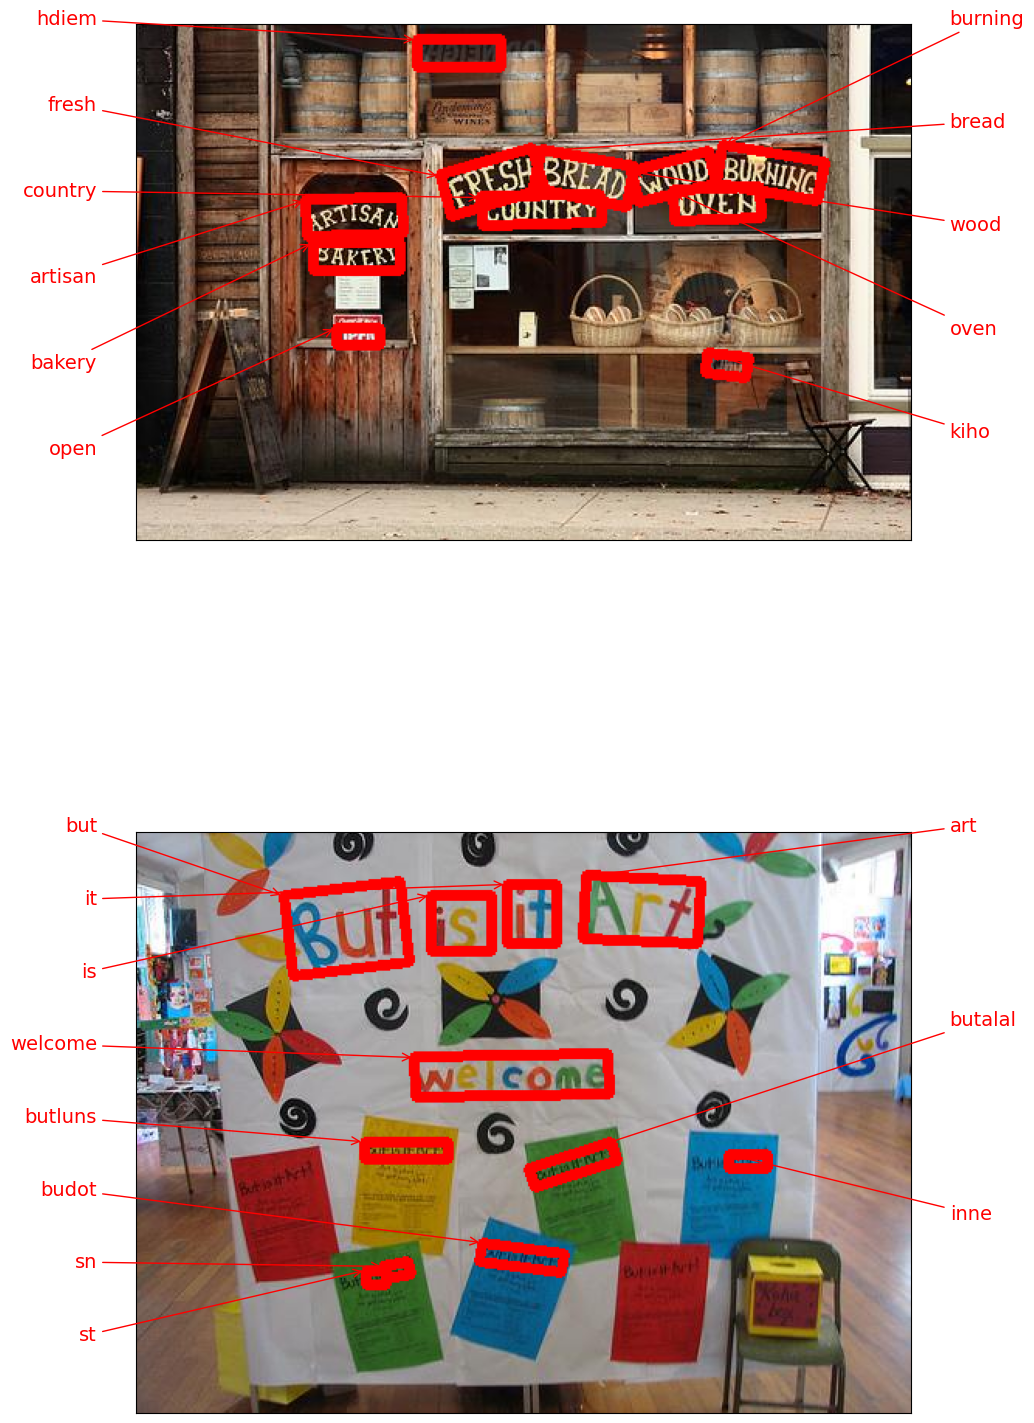

In [ ]:
# Read the images we want to visualize
images = [keras_ocr.tools.read(img) for img in ['/content/dlnn-project_ia-group_15/data/JPEGImages/n02776631_310.jpg', '/content/dlnn-project_ia-group_15/data/JPEGImages/n02746978_10031.jpg']]

# Resize and predict the words in the images
pipeline = keras_ocr.pipeline.Pipeline()
prediction_groups = pipeline.recognize(images)

# Visualize the words in the images
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)
